<a href="https://colab.research.google.com/github/sjbriggsdev/cd_finalproject/blob/master/Final_Project_Predict_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Predict Heart Disease
- Steven Briggs
- 03/15/22

## DATA CLEANING AND PREP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATA/chddata.csv')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
# using this command to compare to Data Dictionary dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


---

First attempt to convert Na_to_K Column failed because of a string so I replaced that string with a number and tried again.

---

In [ ]:
# Checking for null values shows Age and BP Columns with missing
df.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [ ]:
# Checking for duplicated rows, found none.
df[df.duplicated()]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd


---

The function below looks for unique values in each column

---

In [ ]:
for col in df:
  isunique = df[col].unique()
  isunique.sort()
  print(f'- {col}:')
  print(isunique)

- sbp:
[101 102 103 106 108 109 110 112 114 116 117 118 120 121 122 123 124 126
 127 128 129 130 132 134 136 137 138 140 142 143 144 145 146 148 150 152
 153 154 156 158 160 161 162 164 166 168 170 174 176 178 180 182 188 190
 194 198 200 206 208 214 216 218]
- tobacco:
[0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02
 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.200e-01 1.600e-01 1.800e-01
 2.100e-01 2.800e-01 3.000e-01 3.100e-01 4.000e-01 4.100e-01 4.200e-01
 4.500e-01 4.600e-01 4.800e-01 5.000e-01 5.200e-01 5.400e-01 5.600e-01
 5.700e-01 6.000e-01 6.100e-01 6.400e-01 7.000e-01 7.200e-01 7.300e-01
 7.500e-01 7.600e-01 8.000e-01 8.100e-01 8.700e-01 9.000e-01 9.200e-01
 9.500e-01 9.600e-01 1.000e+00 1.020e+00 1.030e+00 1.040e+00 1.050e+00
 1.080e+00 1.100e+00 1.150e+00 1.160e+00 1.200e+00 1.220e+00 1.250e+00
 1.320e+00 1.350e+00 1.360e+00 1.400e+00 1.440e+00 1.500e+00 1.520e+00
 1.530e+00 1.600e+00 1.610e+00 1.620e+00 1.680e+00 1.700e+00 1.720e+00
 1.750e+00 1.800e+0

---

Looking at the object columns, I found famhist has two entries "Absent" or "Present" so I set them to numeric.

---

In [ ]:
df['famhist'].replace({"Absent": 0,"Present": 1}, inplace=True)

In [ ]:
# Checking the DF after changes
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [ ]:
# Checking the object types after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


In [ ]:
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


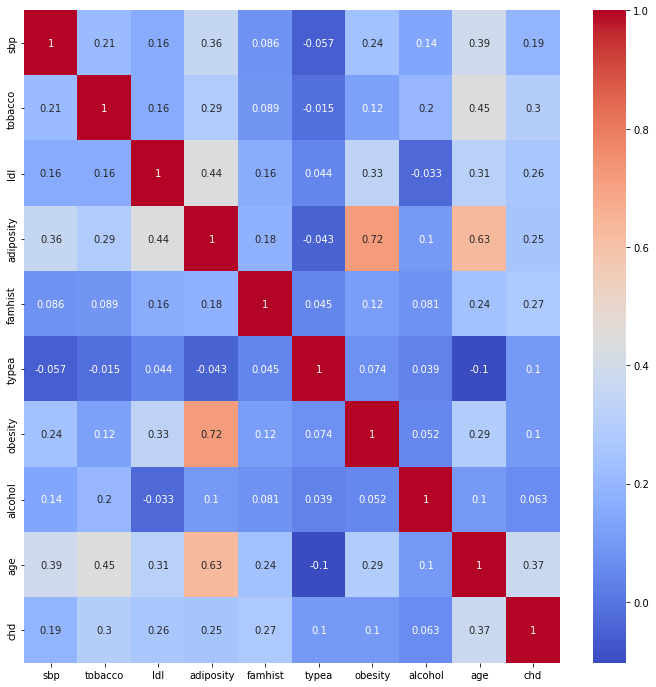

In [ ]:
# plot a heatmap of all numeric data with annotation
corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')

---

There appear to be strong correlations between Age, Obesity, and Adiposity (fatty tissue in the body).  Not as high but decent correlations between tobacco use and Age, as well as Adiposity and LDL (cholesterol).

---


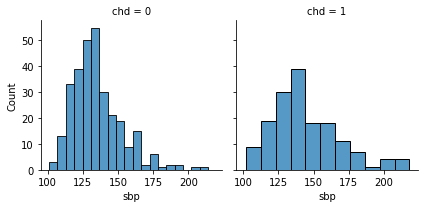

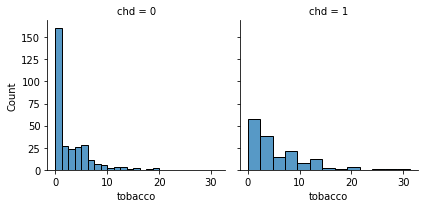

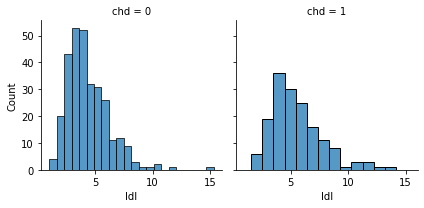

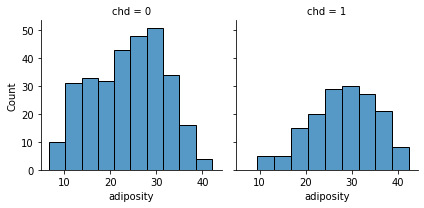

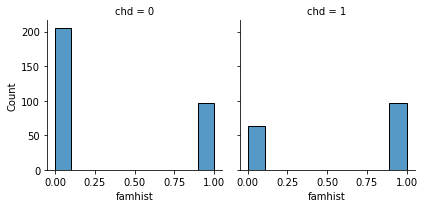

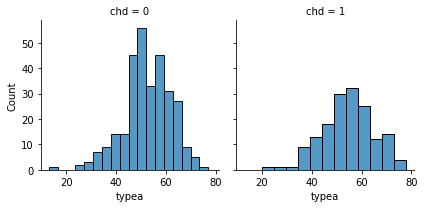

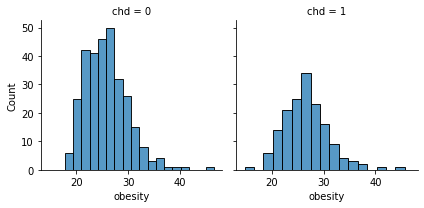

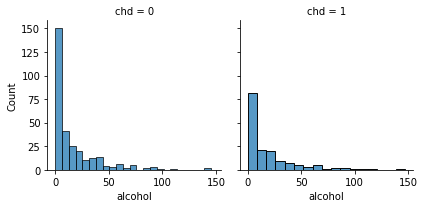

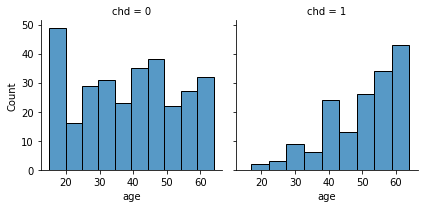

In [ ]:
# I found a visualization called FacetGrid that allows me to compare
# a one feature against the others in a meaningful way

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="sbp")
  
fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="tobacco")

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="ldl")
  
fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="adiposity")

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="famhist")
  
fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="typea")

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="obesity")
  
fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="alcohol")

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="age")
  

---

The chart above is a histogram showing the diagnosis of Coronary Heart Disease (CHD 0 is negative, CHD 1 is positive) against each feature in the dataframe
which allows me to directly compare each feature.

---